In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wandb_loader import get_sweep_results, EPOCH, COCO_AP

colors = sns.color_palette("mako")

sns.set(
    style='whitegrid',
    font_scale=1.2,
    rc={
        'lines.linewidth': 1.2,
        'lines.markersize': 18,
    }
)

fig_path = Path('./imgs')

## AP van branched models

Sweep [an4t3eqd](https://wandb.ai/jpdr/experiments/sweeps/an4t3eqd)

In [2]:
df = get_sweep_results("an4t3eqd", lazy=True, config_keys=['branch_layer'])

LAST_COMMON = 'Last common layer'

bl_to_last_common = {
    'layer1': 'conv1',
    'layer2': 'conv2_x',
    'layer3': 'conv3_x',
    'layer4': 'conv4_x',
    'bbox_head': 'conv5_x',
    'final_pool': 'pool',
    'roi_head': 'bbox head',
}

df[LAST_COMMON] = df['branch_layer'].apply(lambda k: bl_to_last_common[k])

order = ['conv2_x', 'conv3_x', 'conv4_x', 'conv5_x', 'bbox head']

df = df[df[LAST_COMMON].isin(order)]

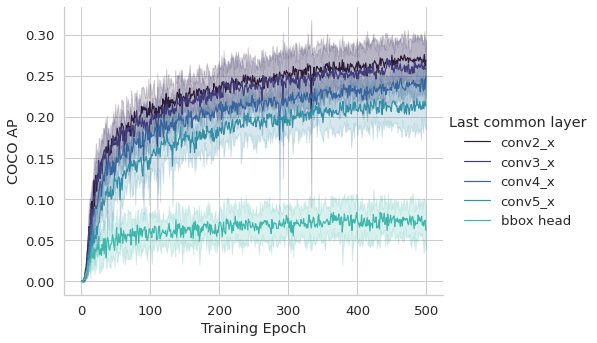

In [3]:
fig = sns.relplot(
    data=df,
    x=EPOCH, y=COCO_AP, kind='line', ci='sd', aspect=4/3,
    hue=LAST_COMMON, hue_order=order,
    palette=colors[:5]
)

In [4]:
fig.savefig(fig_path / 'COCO_AP_branched_models.png')